Logistic Regression

Importing data

In [1]:
import pandas as pd

In [20]:
titanic = pd.read_csv("https://raw.githubusercontent.com/rolandmueller/titanic/main/titanic3.csv")

In [21]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Exploring the data

In [4]:
titanic.shape

(1309, 14)

In [5]:
titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [6]:
import seaborn as sns

<Axes: xlabel='survived', ylabel='count'>

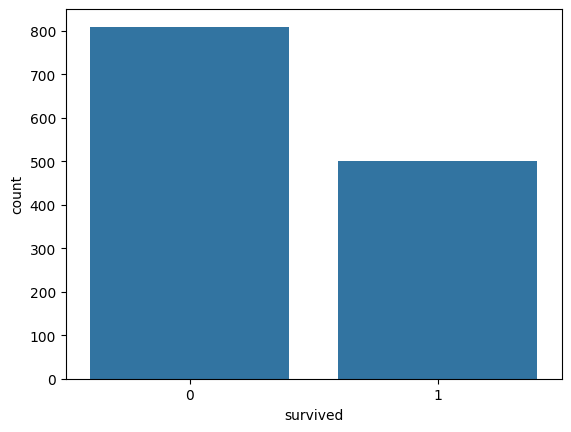

In [7]:
sns.countplot(x="survived",data=titanic)

<Axes: xlabel='survived', ylabel='count'>

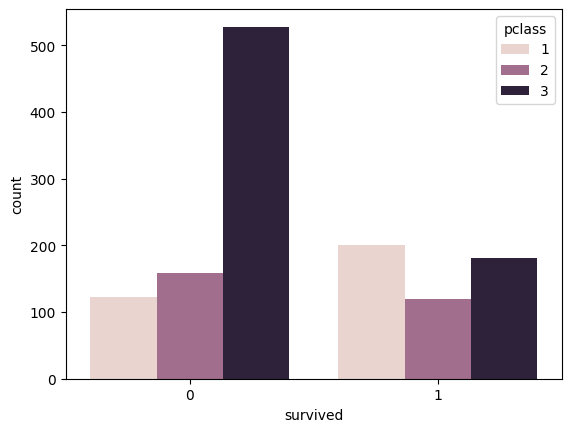

In [9]:
sns.countplot(x="survived",hue="pclass",data=titanic)

<Axes: xlabel='survived', ylabel='count'>

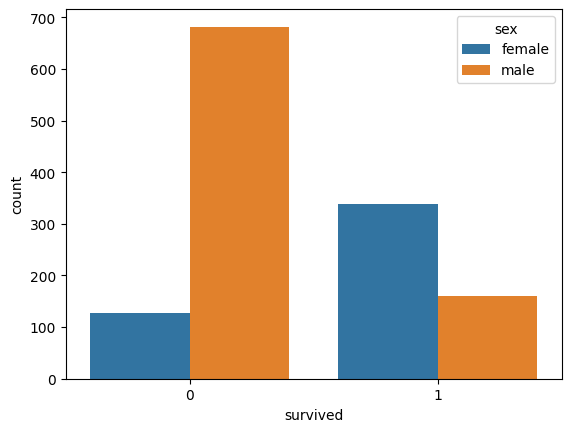

In [10]:
sns.countplot(x="survived",hue="sex",data=titanic)

<Axes: ylabel='Frequency'>

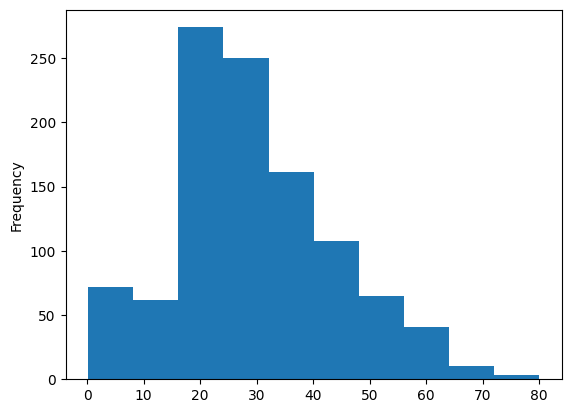

In [11]:
titanic["age"].plot.hist()

<Axes: ylabel='Frequency'>

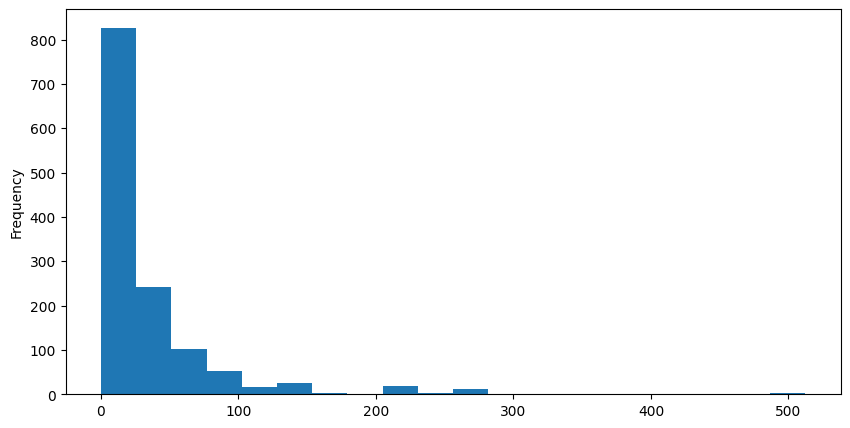

In [12]:
titanic["fare"].plot.hist(bins=20,figsize=(10,5))

<Axes: xlabel='sibsp', ylabel='count'>

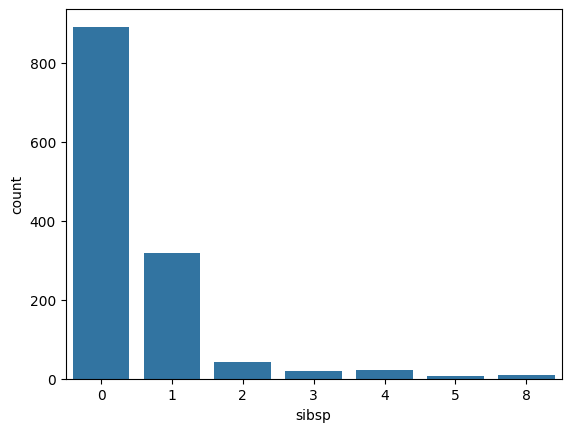

In [13]:
sns.countplot(x="sibsp",data=titanic)

In [14]:
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<Axes: >

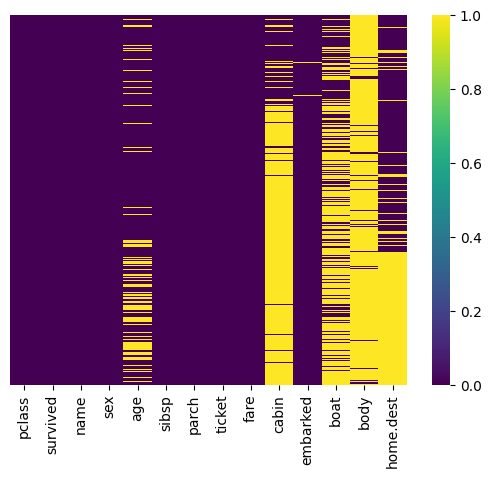

In [15]:
sns.heatmap(titanic.isnull(),yticklabels=False,cmap="viridis")

Preprocessing the data

In [22]:
titanic.drop(["cabin","boat","body","home.dest"],axis=1,inplace=True)

In [23]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [24]:
titanic.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
dtype: int64

In [25]:
titanic.dropna(inplace=True)

In [26]:
titanic.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [27]:
titanic.dtypes

pclass        int64
survived      int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
embarked     object
dtype: object

In [28]:
sex=pd.get_dummies(titanic["sex"],drop_first=True)

In [29]:
sex.head()

,male
0,False
1,True
2,False
3,True
4,False


In [30]:
titanic.embarked.value_counts()

embarked
S    781
C    212
Q     50
Name: count, dtype: int64

In [31]:
embarked=pd.get_dummies(titanic["embarked"],drop_first=True)

In [32]:
pclass=pd.get_dummies(titanic["pclass"],drop_first=True)

In [33]:
titanic.drop(["sex","embarked","pclass"],axis=1,inplace=True)

In [35]:
titanic=pd.concat([titanic,sex,embarked,pclass],axis=1)

In [36]:
titanic.dtypes

survived      int64
name         object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
male           bool
Q              bool
S              bool
2              bool
3              bool
dtype: object

In [37]:
titanic.drop(["name","ticket"],axis=1,inplace=True)

In [38]:
titanic.head()

,survived,age,sibsp,parch,fare,male,Q,S,2,3
0,1,29.0000,0,0,211.3375,False,False,True,False,False
1,1,0.9167,1,2,151.5500,True,False,True,False,False
2,0,2.0000,1,2,151.5500,False,False,True,False,False
3,0,30.0000,1,2,151.5500,True,False,True,False,False
4,0,25.0000,1,2,151.5500,False,False,True,False,False


In [40]:
X=titanic.drop("survived",axis=1)
y=titanic["survived"]

Building the model

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=100)

In [43]:
from sklearn.linear_model import LogisticRegression

In [46]:
lg_model=LogisticRegression(max_iter=1000)

In [48]:
X_train.columns = X_train.columns.astype(str)

In [49]:
lg_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [51]:
X_test.columns = X_test.columns.astype(str)

Evaluating the model

In [52]:
lg_model.score(X_test,y_test)

0.7701149425287356

In [53]:
lg_model.score(X_train,y_train)

0.8069053708439897

Tuning the hyperparameters

In [54]:
lg_model=LogisticRegression(C=0.1,max_iter=1000)
lg_model.fit(X_train,y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [55]:
print(lg_model.score(X_test,y_test))
print(lg_model.score(X_train,y_train))

0.7816091954022989
0.7953964194373402


In [56]:
from sklearn.metrics import confusion_matrix

Predicting the data

In [57]:
predict=lg_model.predict(X_test)

In [58]:
confusion_matrix(y_test,predict)

array([[124,  21],
       [ 36,  80]], dtype=int64)

In [59]:
titanic.head()

,survived,age,sibsp,parch,fare,male,Q,S,2,3
0,1,29.0000,0,0,211.3375,False,False,True,False,False
1,1,0.9167,1,2,151.5500,True,False,True,False,False
2,0,2.0000,1,2,151.5500,False,False,True,False,False
3,0,30.0000,1,2,151.5500,True,False,True,False,False
4,0,25.0000,1,2,151.5500,False,False,True,False,False


In [60]:
import numpy as np
new_titanic=np.array([[29,0,0,211.3375,0,0,1,0,0]])

In [61]:
lg_model.predict(new_titanic)

c:\users\sıla\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [62]:
lg_model.coef_

array([[-0.03162016, -0.31973449,  0.0668491 ,  0.00648786, -1.80552453,
        -0.41797696, -0.37475219, -0.17839833, -1.02507838]])

In [63]:
new_titanic2=np.array([[30,1,1,150,0,0,1,0,0]])
lg_model.predict(new_titanic2)

c:\users\sıla\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)